# 1. Import libraries 

In [201]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import matplotlib.pyplot as plt
%matplotlib inline    
import matplotlib as mpl

import math
from datetime import datetime
from datetime import timedelta
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


# 2. Read information basic dataset

In [202]:
df = pd.read_csv('Supmarket_X.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [203]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67
6434,45,26-10-2012,760281.43,0,58.85,3.88,192.31,8.67


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [205]:
df.shape

(6435, 8)

In [206]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Thay thế mọi dấu gạch dưới "_" trong tên cột bằng khoảng trắng. Điều này giúp làm cho tên cột trở nên dễ đọc hơn và dễ hiểu hơn.

In [207]:
# Làm sạch tên cột
df.columns = df.columns.str.replace('_',' ')
df.columns

Index(['Store', 'Date', 'Weekly Sales', 'Holiday Flag', 'Temperature',
       'Fuel Price', 'CPI', 'Unemployment'],
      dtype='object')

# 3. Data pre-processing

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly Sales  6435 non-null   float64
 3   Holiday Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [209]:
df.describe()

,Store,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [210]:
df.isnull().sum()

Store           0
Date            0
Weekly Sales    0
Holiday Flag    0
Temperature     0
Fuel Price      0
CPI             0
Unemployment    0
dtype: int64

In [211]:
# Đưa dữ liệu thời gian về 1 định dạng chung
date = []
for i in df['Date']:
    i = i.replace('/','-')
    date.append(i)
df.drop('Date', axis=1)
df['Date'] = date
df

,Store,Date,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67


Có thể thấy rằng không có giá trị trống nào trong bộ dữ liệu

In [212]:
#Chuyển đổi kiểu dữ liệu của Date từ object sang datetime
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly Sales  6435 non-null   float64       
 3   Holiday Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [213]:
#Tách cột dữ liệu Ngày tháng thành các cột Ngày, tháng, năm
def split_date(df):
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0   
    df['Year']=df.Date.dt.year
    df['Month']=df.Date.dt.month
    df['Day']=df.Date.dt.day
split_date(df)

In [214]:
df.head()

,Store,Date,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment,WeekOfYear,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,5.00,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,6.00,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,7.00,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,8.00,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,9.00,2010,3,5


# 4. Exploratory Data Analysis


In [215]:
#Bảng hệ số tương quan
correlation = df.corr()
correlation

,Store,Date,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment,WeekOfYear,Year,Month,Day
Store,1.00,0.00,-0.34,-0.00,-0.02,0.06,-0.21,0.22,0.00,0.00,0.00,0.00
Date,0.00,1.00,0.01,-0.01,0.15,0.77,0.08,-0.25,0.16,0.94,0.15,0.04
Weekly Sales,-0.34,0.01,1.00,0.04,-0.06,0.01,-0.07,-0.11,0.07,-0.02,0.08,-0.02
Holiday Flag,-0.00,-0.01,0.04,1.00,-0.16,-0.08,-0.00,0.01,0.13,-0.06,0.12,0.04
Temperature,-0.02,0.15,-0.06,-0.16,1.00,0.14,0.18,0.10,0.24,0.06,0.24,0.03
Fuel Price,0.06,0.77,0.01,-0.08,0.14,1.00,-0.17,-0.03,-0.03,0.78,-0.04,0.03
CPI,-0.21,0.08,-0.07,-0.00,0.18,-0.17,1.00,-0.30,0.01,0.07,0.00,0.00
Unemployment,0.22,-0.25,-0.11,0.01,0.10,-0.03,-0.30,1.00,-0.02,-0.24,-0.01,-0.00
WeekOfYear,0.00,0.16,0.07,0.13,0.24,-0.03,0.01,-0.02,1.00,-0.18,1.00,0.10
Year,0.00,0.94,-0.02,-0.06,0.06,0.78,0.07,-0.24,-0.18,1.00,-0.19,0.01


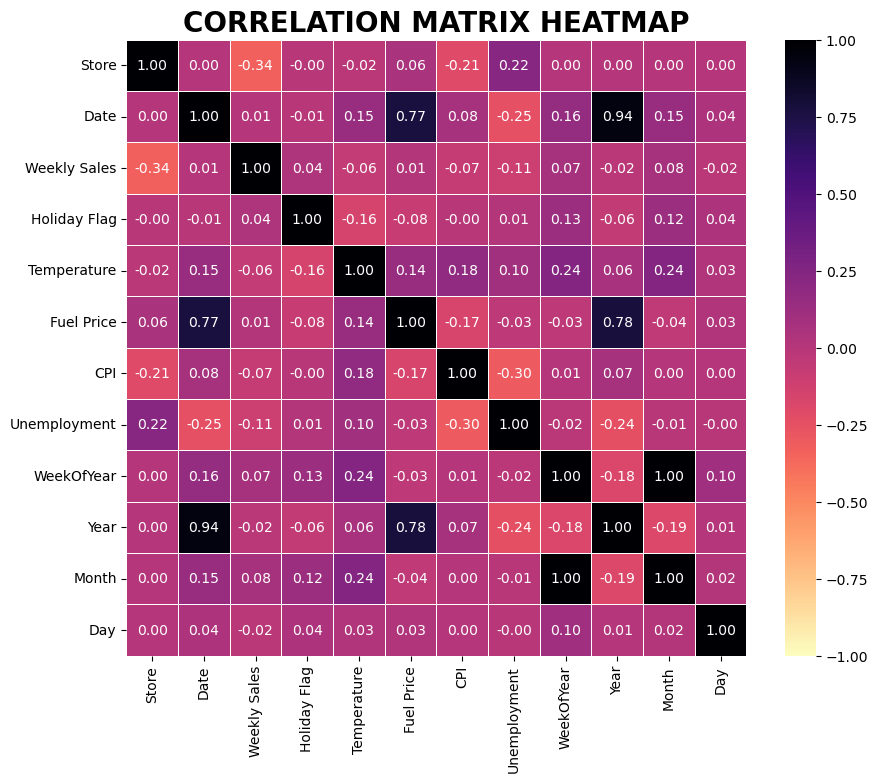

In [216]:
#Trực quan hóa bằng biểu đồ nhiệt
sns.set_style({'font.family':'sans', 'font.serif':'Roboto'})
plt.figure(figsize= (10,8))
plt.title('CORRELATION MATRIX HEATMAP', fontweight = 'heavy', fontsize = 20)
sns.heatmap(correlation, annot= True,
 cmap= "magma_r",
 vmin= -1, vmax= 1,
 linecolor = 'white', linewidths = 0.5,
 fmt = '.2f'
          )
plt.show()


## Question 1:  Ngày lễ nào có doanh số bán hàng trung bình cao nhất?

**Có 4 kỳ nghỉ là:**

Super Bowl: ngày 12 tháng 2 năm 2010, ngày 11 tháng 2 năm 2011, ngày 10 tháng 2 năm 2012, ngày 8 tháng 2 năm 2013

Ngày lao động: ngày 10 tháng 9 năm 2010, ngày 9 tháng 9 năm 2011, ngày 7 tháng 9 năm 2012, ngày 6 tháng 9 năm 2013

Lễ tạ ơn: 26 tháng 11, ngày 25 tháng 11, 11, 23 tháng 11, 12, ngày 29 tháng 11, 13

Giáng sinh: ngày 31 tháng 12 năm 2010, ngày 30 tháng 12 năm 2011, ngày 28 tháng 12 năm 2012, ngày 27 tháng 12 năm 2013

In [162]:
print(df.shape)
df['Holiday Flag'].value_counts()

(6435, 12)


Holiday Flag
0    5985
1     450
Name: count, dtype: int64

In [163]:
df_holiday= df.loc[df['Holiday Flag']== 1] # Những ngày là ngày lễ
df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [164]:
df_not_holiday=df.loc[df['Holiday Flag']==0] # Những ngày không phải là ngày lễ
df_not_holiday['Date'].nunique()

133

Số tuần có ngày lễ: 10

Số tuần không có ngày lễ: 133


In [165]:
# Gán ngày lễ cho các tuần tương ứng
holiday = {6:"Super Bowl", 36:"Labor day", 47:"Thanksgiving", 51:"Christmas"}

In [166]:
holidays = df[df["WeekOfYear"].isin([6,36,47,51])]
holiday_mean = holidays[["Weekly Sales", "WeekOfYear"]]
holiday_mean = holidays[["Weekly Sales", "WeekOfYear"]].groupby(["WeekOfYear"]).mean().reset_index().sort_values('Weekly Sales', ascending=False)
holiday_mean = holiday_mean.rename(columns={"WeekOfYear":"Holiday"})
holiday_mean["Holiday"] = holiday_mean["Holiday"].map(holiday)
holiday_mean

,Holiday,Weekly Sales
3,Christmas,1754773.97
2,Thanksgiving,1471273.43
0,Super Bowl,1079127.99
1,Labor day,1042427.29


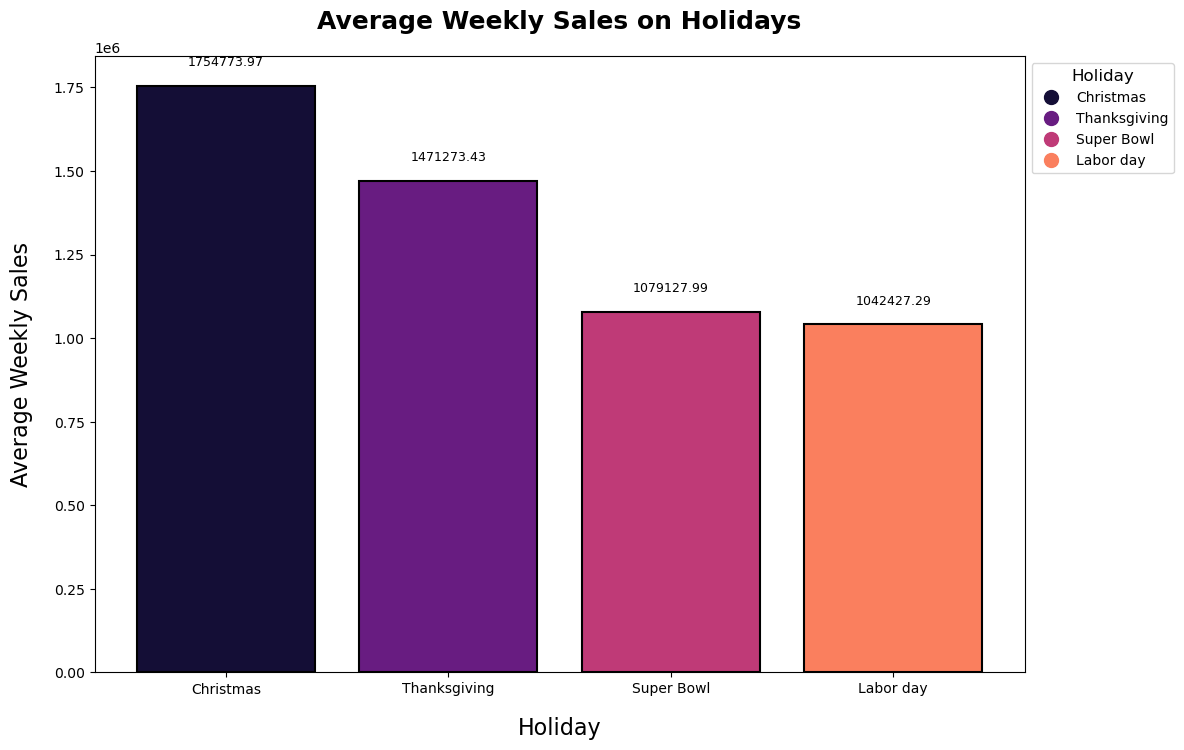

In [167]:
holidays = holiday_mean["Holiday"]
weekly_sales = holiday_mean["Weekly Sales"]

colors = plt.cm.magma(np.linspace(0.1, 2, 10))

#Trực quan hóa dữ liệu
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(holidays, weekly_sales, color=colors, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Holiday', fontsize= 16, labelpad= 15)
ax.set_ylabel('Average Weekly Sales', fontsize=16, labelpad= 15)
ax.set_title('Average Weekly Sales on Holidays', pad=20, fontweight='bold', fontsize = 18)

# Hiển thị giá trị trên cột dữ liệu
for bar, value in zip(bars, weekly_sales):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50000, f'{value:.2f}', 
            ha='center', va='bottom', fontsize=9)

# Tạo bảng chú thích
legend_labels = holidays
legend_handles = [plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=10, label=label) for color, label in zip(colors, legend_labels)]
ax.legend(handles=legend_handles, title='Holiday', title_fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


Lễ Giáng sinh là ngày lễ có có doanh thu tuần cao nhất là **$1754773**

## Question 2: Ngày lễ có tác động tích cực hay tiêu cực đến doanh số như thế nào?



Để nhìn rõ sự khác biệt giữa các loại ngày lễ, tôi đã tạo ra bốn cột mới để đại diện cho bốn loại ngày lễ khác nhau. Các cột này được điền giá trị Boolean, nơi mà mỗi ngày sẽ có giá trị True nếu thuộc về một loại kỳ nghỉ cụ thể và False nếu không phải. Điều này giúp tạo ra một cấu trúc dữ liệu dễ dàng nhận biết, làm cho quá trình phân tích và nhận thức về xuất hiện của các loại ngày lễ trở nên thuận lợi.


In [168]:
df['Christmas'] = df['WeekOfYear'].map(holiday) == "Christmas"
df['Thanksgiving'] = df['WeekOfYear'].map(holiday) == "Thanksgiving"
df['Super Bowl'] = df['WeekOfYear'].map(holiday) == "Super Bowl"
df['Labor day'] = df['WeekOfYear'].map(holiday) == "Labor day"

### So sánh trung bình Weekly Sales của ngày lễ Giáng sinh và không phải lễ Giáng sinh

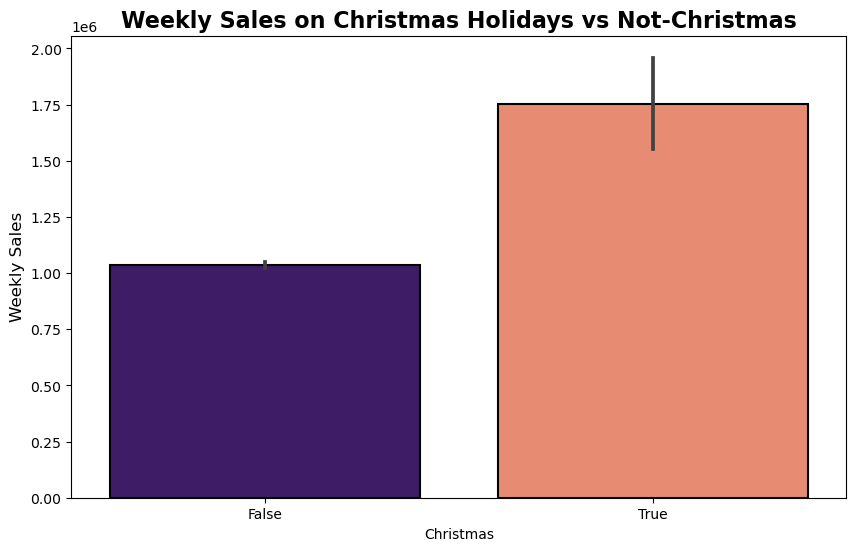

In [169]:
colors = plt.cm.magma(np.linspace(0, 2, 20))

plt.figure(figsize=(10, 6))
palette = {True: colors [7] , False: colors[2]}  
ax = sns.barplot(x='Christmas', y='Weekly Sales', data=df, palette=palette, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Weekly Sales', fontsize=12)
ax.set_title('Weekly Sales on Christmas Holidays vs Not-Christmas', fontsize=16, fontweight='bold')

plt.show()

### So sánh trung bình Weekly Sales của ngày lễ Tạ ơn và không phải lễ Tạ ơn

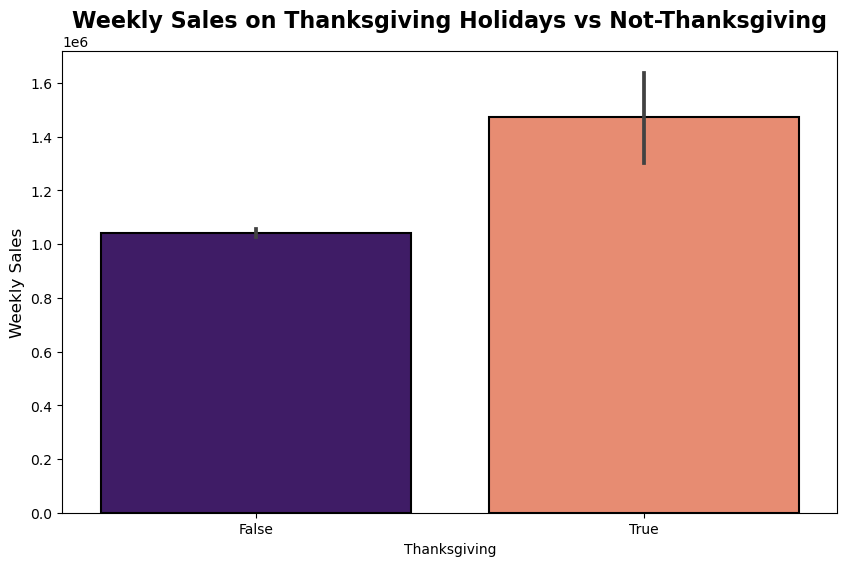

In [170]:
plt.figure(figsize=(10, 6))
palette = {True: colors[7], False: colors[2]}  
ax = sns.barplot(x='Thanksgiving', y='Weekly Sales', data=df, palette=palette,edgecolor='black', linewidth=1.5)

ax.set_ylabel('Weekly Sales', fontsize=12)
ax.set_title('Weekly Sales on Thanksgiving Holidays vs Not-Thanksgiving', fontsize=16, fontweight='bold')

plt.show()


### So sánh trung bình Weekly Sales của ngày lễ Super Bowl và không phải lễ Super Bowl

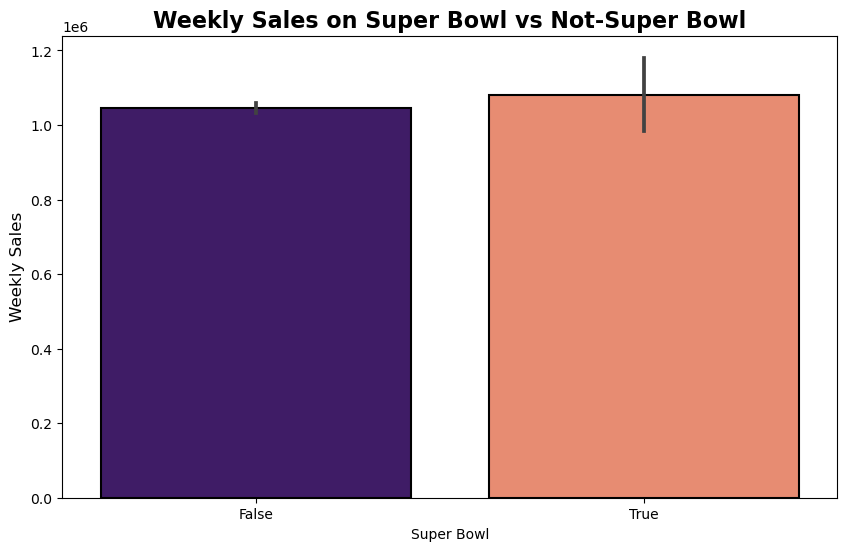

In [171]:
plt.figure(figsize=(10, 6))
palette = {True: colors [7] , False: colors[2]}  
ax = sns.barplot(x='Super Bowl', y='Weekly Sales', data=df, palette=palette, edgecolor='black', linewidth=1.5)


# Customize the plot
ax.set_ylabel('Weekly Sales', fontsize=12)
ax.set_title('Weekly Sales on Super Bowl vs Not-Super Bowl', fontsize=16, fontweight='bold')

plt.show()

### So sánh trung bình Weekly Sales của ngày quốc tế Lao động và không phải ngày Quốc tế Lao động

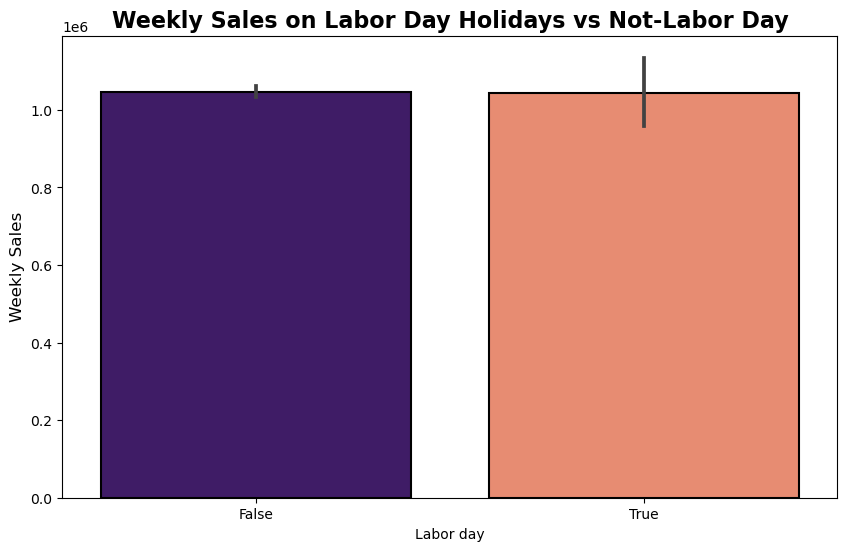

In [172]:
colors = plt.cm.magma(np.linspace(0, 2, 20))

plt.figure(figsize=(10, 6))
palette = {True: colors [7] , False: colors[2]}  
ax = sns.barplot(x='Labor day', y='Weekly Sales', data=df, palette=palette, edgecolor='black', linewidth=1.5)

ax.set_ylabel('Weekly Sales', fontsize=12)
ax.set_title('Weekly Sales on Labor Day Holidays vs Not-Labor Day', fontsize=16, fontweight='bold')

plt.show()

Biểu đồ cho thấy rằng Doanh thu trung bình tuần cao hơn đáng kể vào dịp Giáng sinh (khoảng 1,7 lần) và Lễ Tạ ơn (1,4 lần)
Một trong những nguyên nhân là do Giáng sinh và Lễ Tạ ơn là hai ngày lễ lớn nhất trong năm. Trong thời gian Lễ Tạ ơn cũng là thời điểm diễn ra Black Friday (sự kiện giảm giá lớn nhất năm)
Cùng với đó thì biểu đồ cho thấy doanh thu không có sự thay đổi nhiều trong thời điểm diễn ra ngày Quốc tế Lao động và ngày lễ Super Bowl

## Question 3: Tháng nào có doanh thu cao nhất?

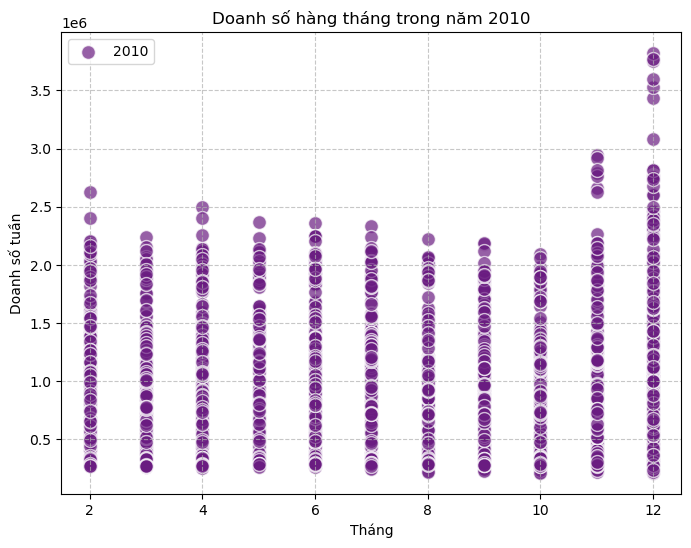

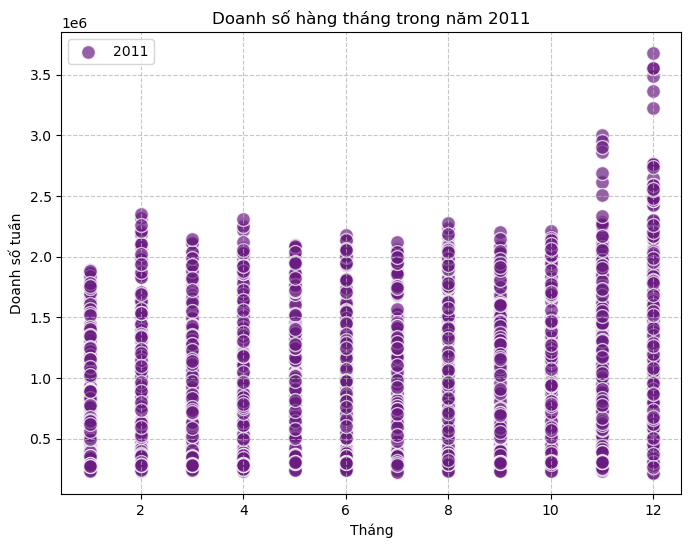

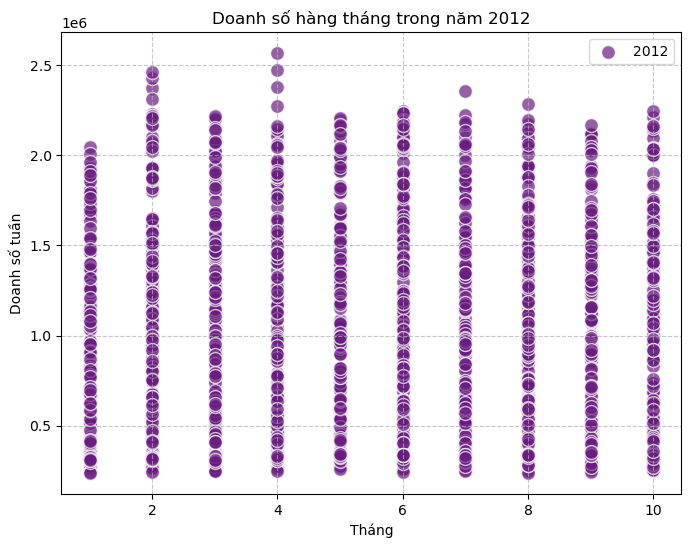

In [173]:
for i in range(2010, 2013):
    plt.figure(figsize=(8, 6))
    plt.scatter(df[df.Year == i]["Month"], df[df.Year == i]["Weekly Sales"], label=str(i), s=100, alpha=0.7, edgecolors= 'w', color = colors[3])
    plt.xlabel("Tháng")
    plt.ylabel("Doanh số tuần")
    plt.title(f"Doanh số hàng tháng trong năm {i}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

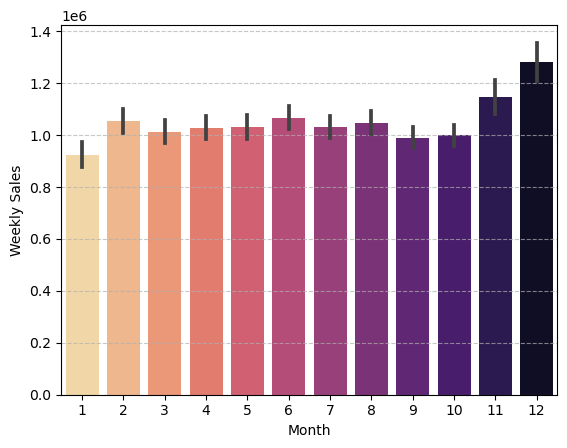

In [174]:
# Doanh thu hàng tháng 
sns.barplot(x='Month', y='Weekly Sales', data=df, palette='magma_r')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nhìn chung doanh số của 2 tháng cuối năm tăng mạnh do gần nhiều ngày lễ lớn như Tết, Lễ Tạ Ơn,... nên nhu cầu mua sắm của người dân tăng cao
Tháng 12 là tháng có doanh thu cao nhất

##  Question 4: Doanh thu hàng tuần thay đổi và đạt mức cao nhất có giống nhau giữa các năm?

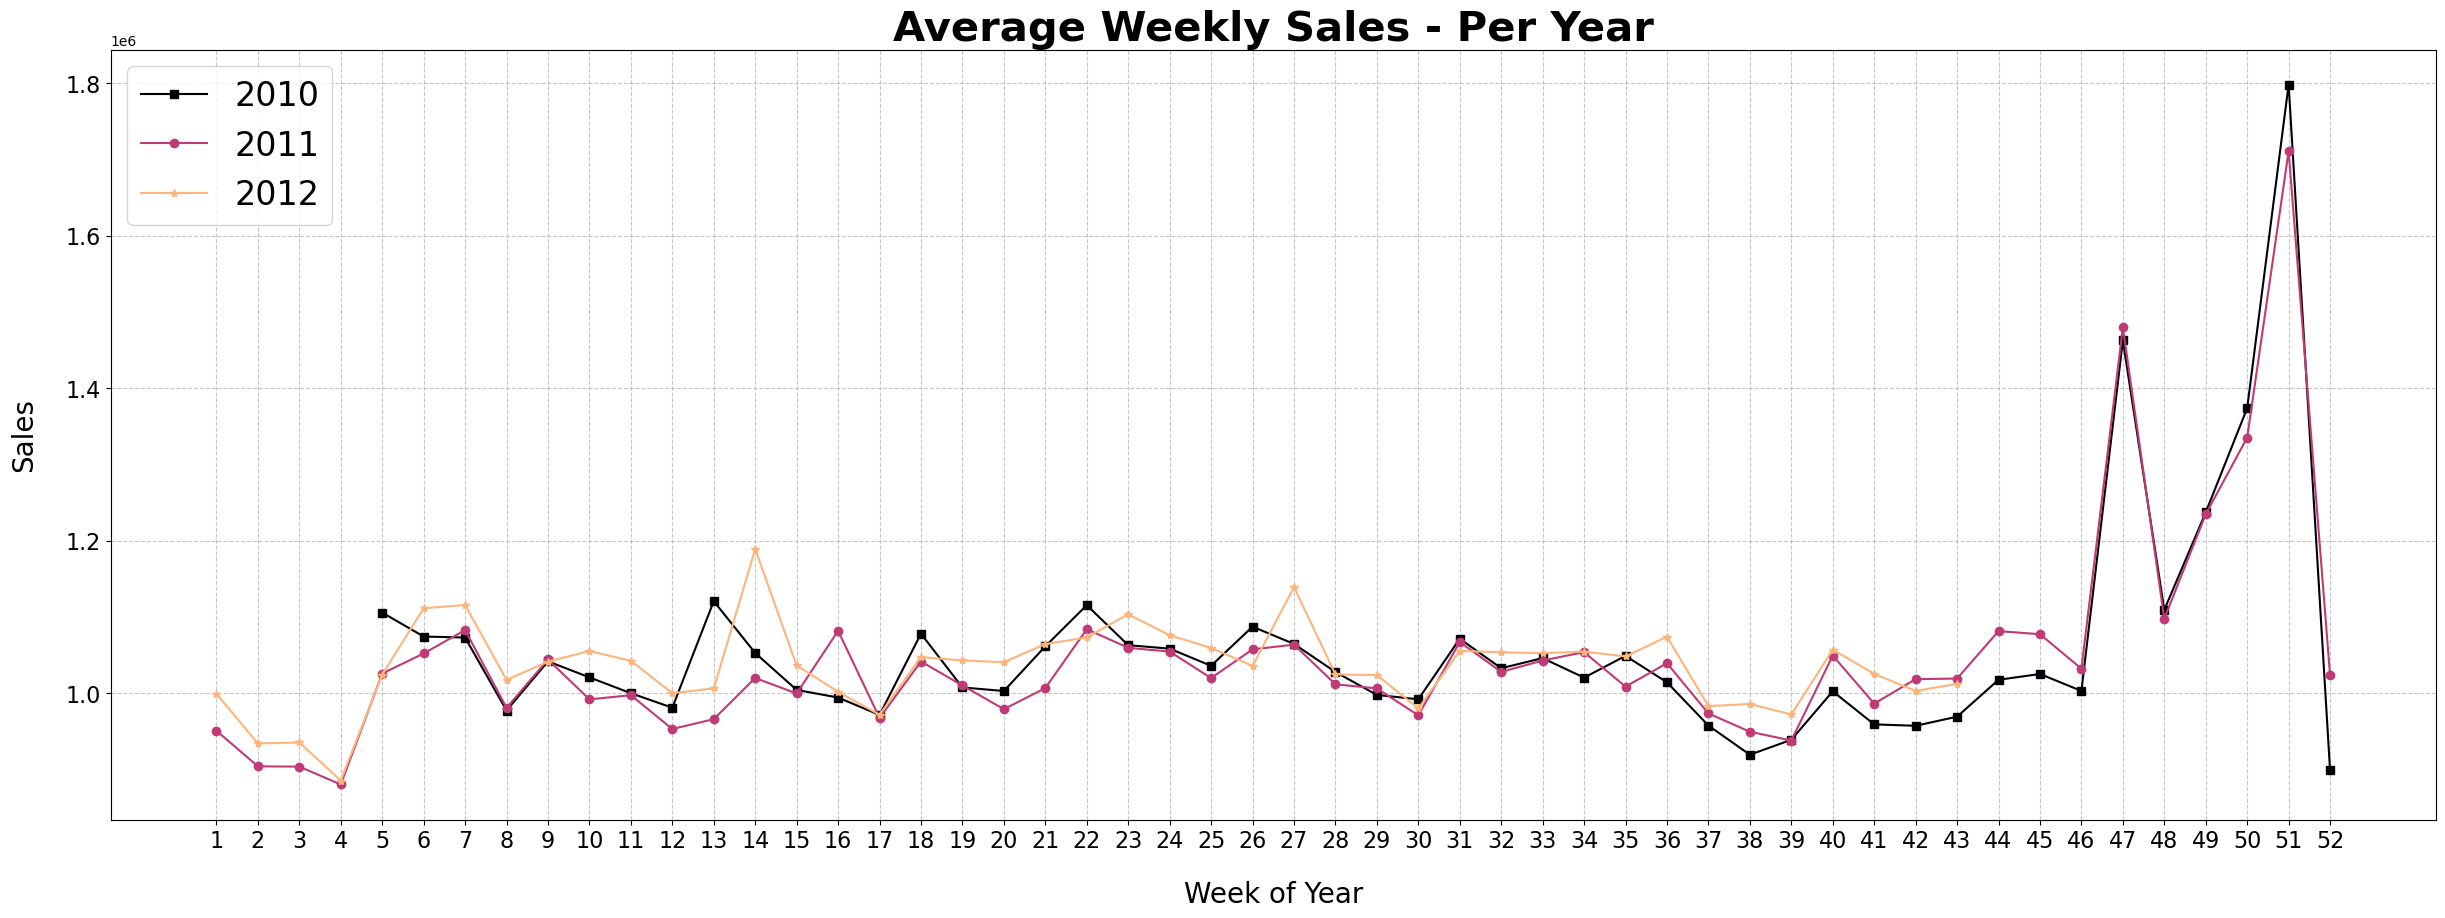

In [175]:
weekly_sales_2010 = df[df.Year == 2010].groupby('WeekOfYear')['Weekly Sales'].mean()
weekly_sales_2011 = df[df.Year == 2011].groupby('WeekOfYear')['Weekly Sales'].mean()
weekly_sales_2012 = df[df.Year == 2012].groupby('WeekOfYear')['Weekly Sales'].mean()

plt.figure(figsize=(30, 10))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-', color=colors [0])
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-', color=colors [5])
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-', color=colors [8])

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize= 30, fontweight='bold' )
plt.legend(['2010', '2011', '2012'], fontsize=24)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Biểu đồ cho thấy doanh thu các năm đều đạt đỉnh vào tuần thứ 47 và tuần 51 là tuần Lễ Tạ ơn và Lễ Giáng sinh, sau đó, qua ngày lễ, doanh thu ngay lập tức sụt giảm

In [176]:
# Lấy ra tuần có doanh số thấp nhất và cao nhất cho mỗi năm
min_week_2010 = weekly_sales_2010.idxmin()
max_week_2010 = weekly_sales_2010.idxmax()

min_week_2011 = weekly_sales_2011.idxmin()
max_week_2011 = weekly_sales_2011.idxmax()

min_week_2012 = weekly_sales_2012.idxmin()
max_week_2012 = weekly_sales_2012.idxmax()

print("Tuần có doanh số thấp nhất năm 2010:", min_week_2010)
print("Tuần có doanh số thấp nhất năm 2011:", min_week_2011)
print("Tuần có doanh số thấp nhất năm 2012:", min_week_2012)

print("\n Tuần có doanh số cao nhất năm 2010:", max_week_2010)
print("Tuần có doanh số cao nhất năm 2011:", max_week_2011)
print("Tuần có doanh số cao nhất năm 2012:", max_week_2012)

Tuần có doanh số thấp nhất năm 2010: 52.0
Tuần có doanh số thấp nhất năm 2011: 4.0
Tuần có doanh số thấp nhất năm 2012: 4.0

 Tuần có doanh số cao nhất năm 2010: 51.0
Tuần có doanh số cao nhất năm 2011: 51.0
Tuần có doanh số cao nhất năm 2012: 14.0


Có thể thấy tuần có doanh số cao nhất các năm đều là tuần 51 trừ 2012 không có dữ liệu tuần thứ 51
Tuần có doanh số thấp nhất là tuần 4 trừ năm 2010 không có dữ liệu tuần thứ 4

## Question 5: Cửa hàng nào có doanh thu cao nhất?

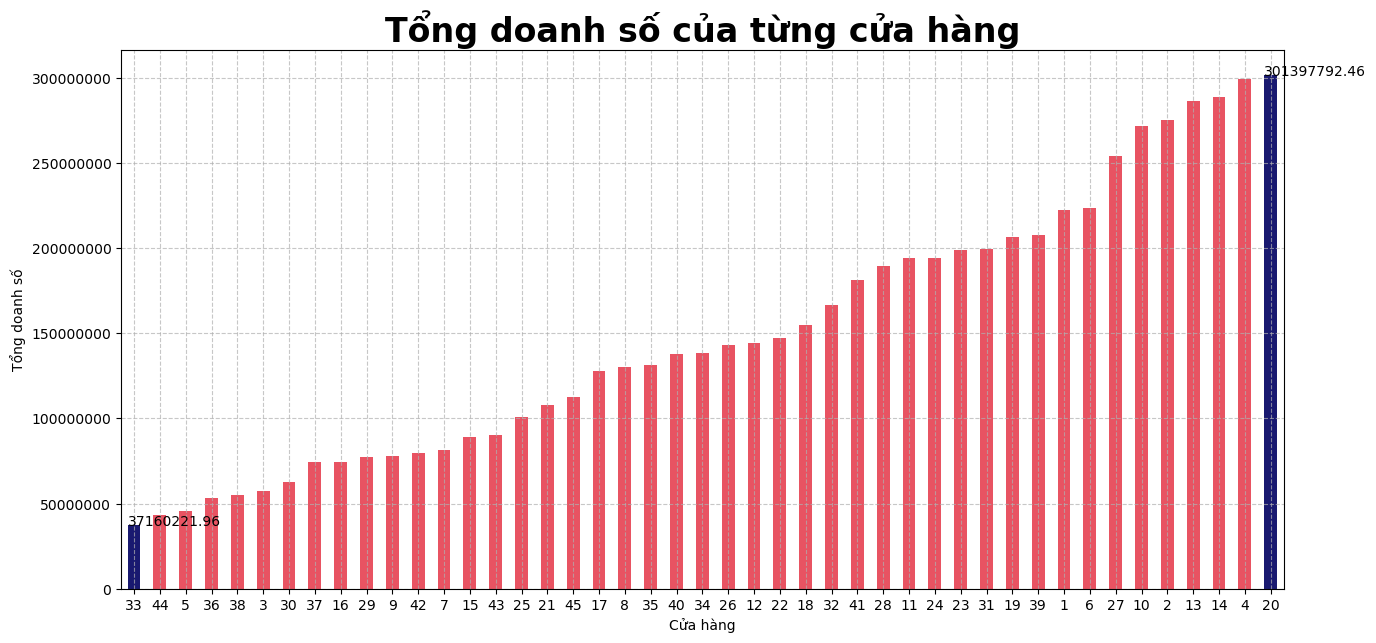

In [217]:
plt.figure(figsize=(15,7))

# Tổng hợp Weekly_Sales cho mỗi cửa hàng, sau đó sắp xếp theo tổng doanh số
tong_doanh_so_theo_cua_hang = df.groupby('Store')['Weekly Sales'].sum().sort_values() 
mang_tong_doanh_so = np.array(tong_doanh_so_theo_cua_hang)  # chuyển thành mảng

# Gán màu cụ thể cho các cửa hàng có doanh số thấp nhất và cao nhất
mau_sac = [colors[6] if ((x < max(mang_tong_doanh_so)) and (x > min(mang_tong_doanh_so))) else 'midnightblue' for x in mang_tong_doanh_so]

ax = tong_doanh_so_theo_cua_hang.plot(kind='bar', color=mau_sac)

# cửa hàng có doanh số thấp nhất
p = ax.patches[0]
ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))

# cửa hàng có doanh số cao nhất
p = ax.patches[44]
ax.annotate(p.get_height(), xy=(p.get_x(), p.get_height()))

# thuộc tính biểu đồ
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Tổng doanh số của từng cửa hàng', fontsize=24, fontweight='bold')
plt.xlabel('Cửa hàng')
plt.ylabel('Tổng doanh số')
plt.grid(True, linestyle='--', alpha=0.7)

## Question 6: Fuel Price, CPI , Unemployment , Temperature có tác động như nào tới doanh thu?

**Fuel Price**

<Axes: xlabel='Fuel Price'>

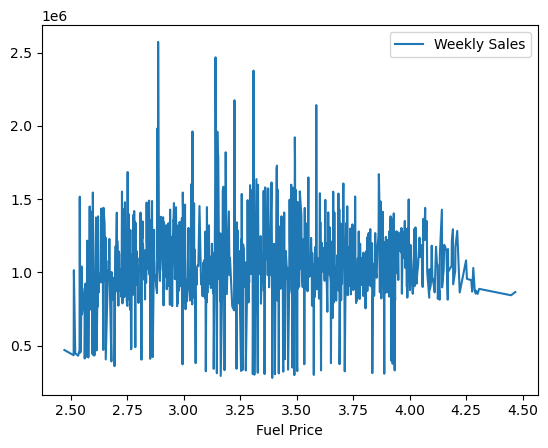

In [196]:
fuel_price = pd.pivot_table(df, values = "Weekly Sales", index= "Fuel Price")
fuel_price.plot()

**Temperature**

<Axes: xlabel='Temperature'>

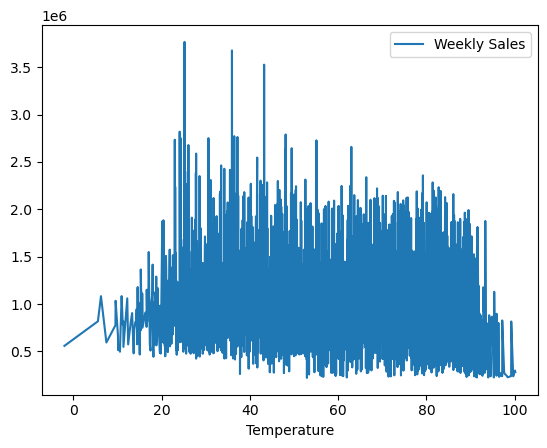

In [197]:
temp = pd.pivot_table(df, values = "Weekly Sales", index= "Temperature")
temp.plot()

**CPI**

<Axes: xlabel='CPI'>

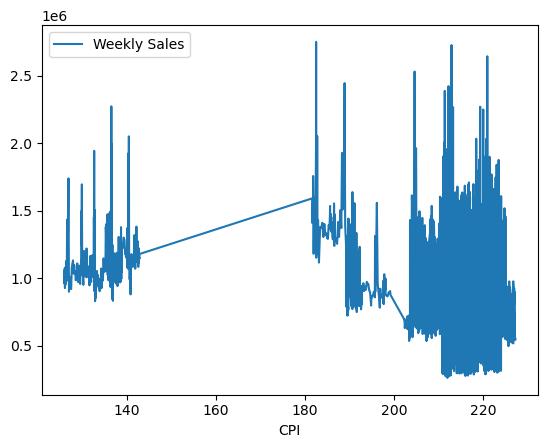

In [198]:
CPI = pd.pivot_table(df, values = "Weekly Sales", index= "CPI")
CPI.plot()

Từ các biểu đồ, người ta thấy rằng không có mô hình đáng kể giữa CPI, nhiệt độ, tỷ lệ thất nghiệp, giá nhiên liệu so với doanh số hàng tuần. Không có dữ liệu cho CPI trong khoảng 140-180.

# Build  prediction models to forecast demand (Modeling)

1. Nhóm 6 sử dụng hàm `train_test_split` để chia dữ liệu thành tập train1 và test ban đầu để thực hiện chuẩn hóa dữ liệu trên từng phần một.
2. Sau đó, nhóm khởi tạo một mô hình và sử dụng phương thức fit để huấn luyện mô hình trên tập train.
3. Tunning:
- Đánh giá mô hình hồi quy trên tập train bằng accuracy, RMSE,  MAE
- Đánh giá mô hình randomforest bằng phương thức accuracy
4. Lựa chọn mô hình
5. Đánh giá mô hình cuối cùng trên tập test


In [179]:
df

,Store,Date,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment,WeekOfYear,Year,Month,Day,Christmas,Thanksgiving,Super Bowl,Labor day
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,5.00,2010,2,5,False,False,False,False
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,6.00,2010,2,12,False,False,True,False
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,7.00,2010,2,19,False,False,False,False
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,8.00,2010,2,26,False,False,False,False
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,9.00,2010,3,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,39.00,2012,9,28,False,False,False,False
6431,45,2012-10-05,733455.07,0,64.89,3.98,192.17,8.67,40.00,2012,10,5,False,False,False,False
6432,45,2012-10-12,734464.36,0,54.47,4.00,192.33,8.67,41.00,2012,10,12,False,False,False,False
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,42.00,2012,10,19,False,False,False,False


## Hồi quy tuyến tính (Linear Regression)

In [180]:
correlation = df[['Store','Weekly Sales', 'Temperature', 'Fuel Price', 'CPI', 'Unemployment']].corr()
print("Ma trận tương quan")
print(correlation)

Ma trận tương quan
              Store  Weekly Sales  Temperature  Fuel Price   CPI  Unemployment
Store          1.00         -0.34        -0.02        0.06 -0.21          0.22
Weekly Sales  -0.34          1.00        -0.06        0.01 -0.07         -0.11
Temperature   -0.02         -0.06         1.00        0.14  0.18          0.10
Fuel Price     0.06          0.01         0.14        1.00 -0.17         -0.03
CPI           -0.21         -0.07         0.18       -0.17  1.00         -0.30
Unemployment   0.22         -0.11         0.10       -0.03 -0.30          1.00


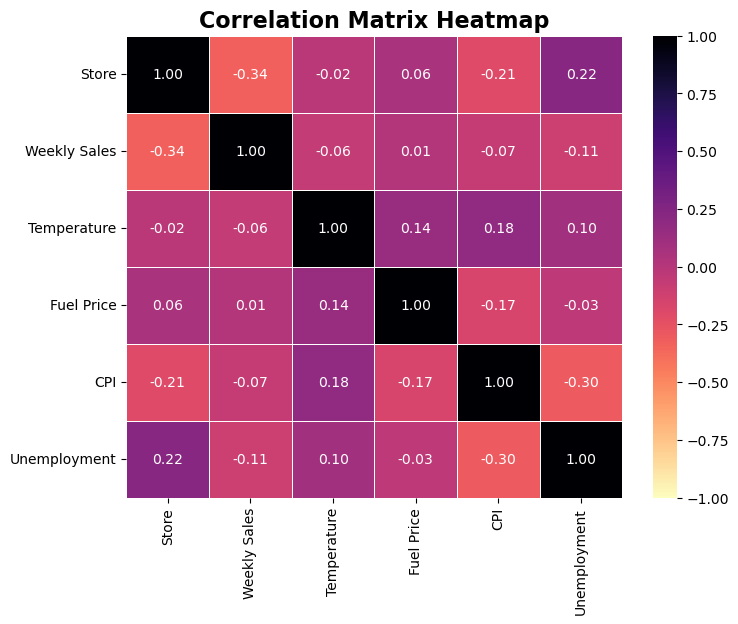

In [181]:
#Visualization heatmap
plt.figure(figsize= (8,6))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True, cmap= 'magma_r', vmin= -1, vmax= 1, linecolor = 'white', linewidths = 0.5, fmt = '.2f')
plt.show()

Nhìn biểu đồ trên ta thấy đa số các biến độc lập đều có độ tương quan thấp so với biến phụ thuộc là Weekly_Sales.  
Từ đó ta có thể rút ra rằng mô hình hồi quy không thực sự phù hợp đối với bộ dữ liệu trên.   
Nhưng ta vẫn sẻ thử sử dụng mô hình hồi quy.

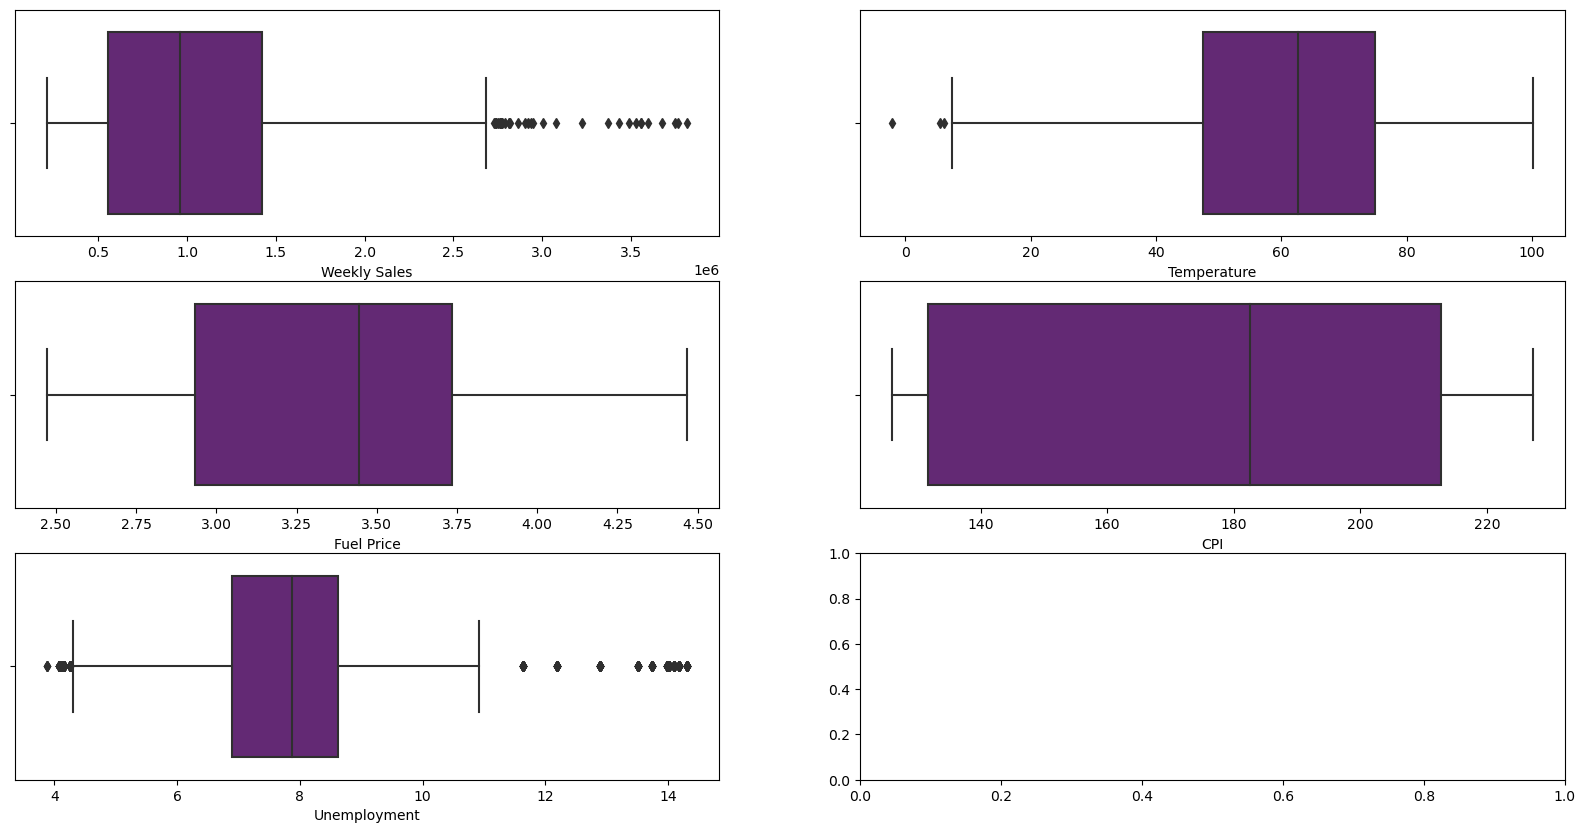

In [182]:
# Find outliers (tìm những giá trị ngoại lai)
fig, axs = plt.subplots(3,2,figsize=(20,10))
X = df[['Weekly Sales','Temperature','Fuel Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x = column, data = df, ax=axs[i//2, i%2], color = colors[3])


Nhìn các biểu đồ ta thấy trong các biến độc lập có khá ít ngoại lai trừ biến Unemployment và biến phụ thuộc Weekly Sales


In [183]:
# drop the outliers (loại bỏ biến ngoại lai)
data_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)& (df['Weekly Sales']<2500000)]
data_new

,Store,Date,Weekly Sales,Holiday Flag,Temperature,Fuel Price,CPI,Unemployment,WeekOfYear,Year,Month,Day,Christmas,Thanksgiving,Super Bowl,Labor day
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,5.00,2010,2,5,False,False,False,False
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,6.00,2010,2,12,False,False,True,False
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,7.00,2010,2,19,False,False,False,False
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,8.00,2010,2,26,False,False,False,False
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,9.00,2010,3,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,39.00,2012,9,28,False,False,False,False
6431,45,2012-10-05,733455.07,0,64.89,3.98,192.17,8.67,40.00,2012,10,5,False,False,False,False
6432,45,2012-10-12,734464.36,0,54.47,4.00,192.33,8.67,41.00,2012,10,12,False,False,False,False
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,42.00,2012,10,19,False,False,False,False


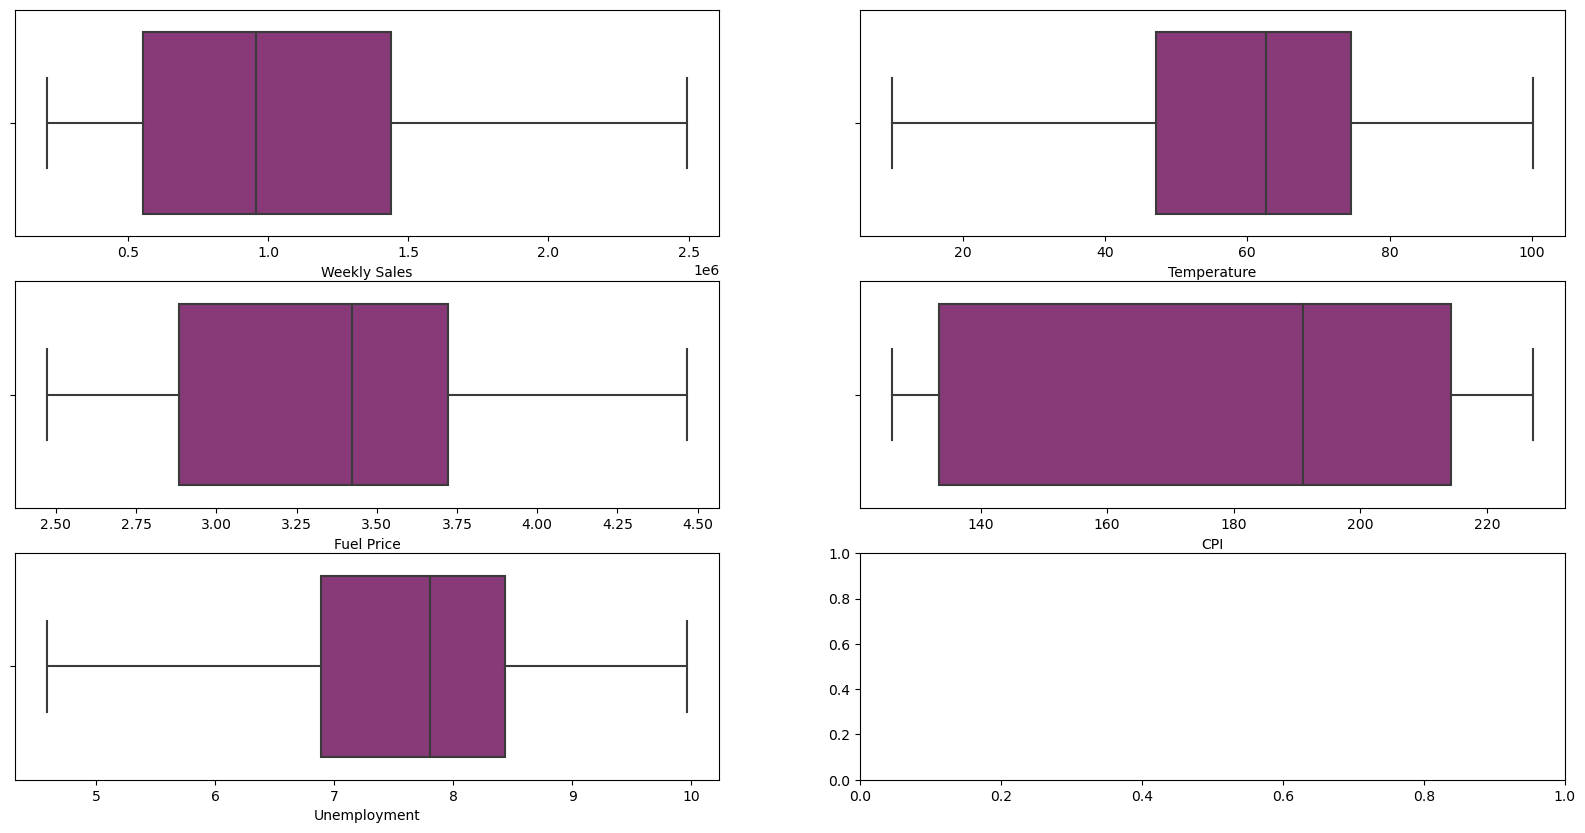

In [184]:
# Kiểm tra biến ngoại lai
fig, axs = plt.subplots(3,2,figsize=(20,10))
X = data_new[['Weekly Sales','Temperature','Fuel Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(x = column, data =data_new, ax=axs[i//2, i%2], color = colors [4])


In [185]:
# Chọn các đặc tính và mục tiêu
X = data_new[['Store','Fuel Price','CPI','Unemployment', 'Temperature']]
y = data_new['Weekly Sales']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Linear Regression:

Accuracy: 12.254389353688588
Mean Absolute Error: 435052.7244361802
Mean Squared Error: 262334748214.08
Root Mean Squared Error: 512186.2436790742


<Axes: ylabel='Weekly Sales'>

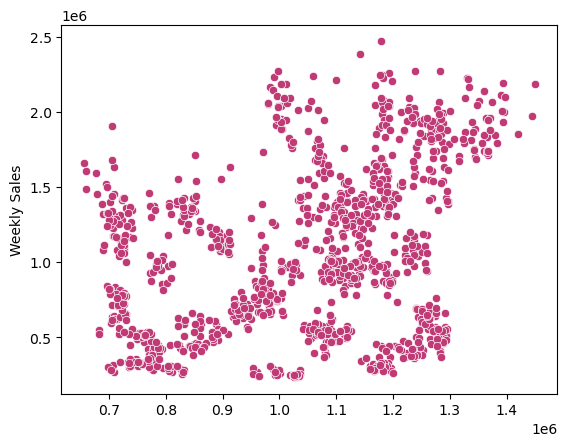

In [186]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test, color = colors [5])


Kết quả thu được rằng: Độ chính xác chỉ vào khoảng 12% => Mô hình không được lựa chọn

## Random Forest

Random Forest Regressor:

Accuracy: 95.60757116999193


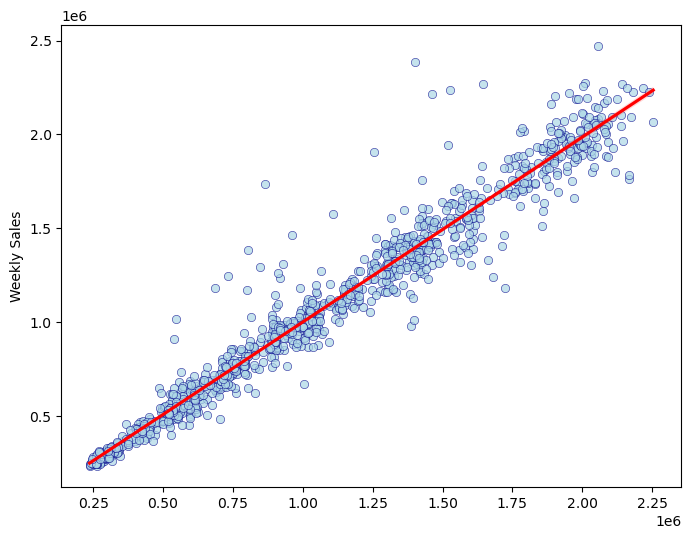

In [187]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()

rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=y_test, color='lightblue', alpha=0.7, edgecolor='darkblue')
sns.regplot(x=y_pred, y=y_test, scatter=False, color='darkblue', line_kws={'color': 'red', 'label': 'OLS'})
plt.show()


Như ta thấy, độ chính xác của mô hình là cao (khoảng 95%).
Khi so sánh giá trị dự đoán và giá trị kiểm thử (hình vẽ), ta thấy chúng tương đối trùng khớp.
Điều này cho thấy có thể sử dụng mô hình này để dự báo doanh thu hàng tuần trong tương lai.


# 5. Conclusion

Thông qua quá trình phân tích khai phá dữ liệu, nhóm đã xác định được ảnh hưởng của các nhân tố tới doanh thu bán hàng theo tuần của siêu thị X. 

**Thông Tin Về Cửa Hàng:**
   - Có tổng cộng 45 cửa hàng trong dữ liệu.
   - Cửa hàng số 20 có doanh thu trung bình cao nhất và cửa hàng số 33 có doanh thu trung bình thấp nhất
  
**Ảnh Hưởng của Ngày Lễ:**
   - Doanh số bán hàng trung bình trong các ngày lễ cao hơn so với các ngày thông thường.
   - Giáng sinh có doanh số bán hàng cao nhất trong các ngày lễ, tiếp sau đó là lễ Tạ ơn. Điều này chỉ ra sự quan trọng của nó đối với doanh số bán hàng của siêu thị. 
   - Super Bowl và Ngày Quốc tế Lao động có doanh thu trung bình không khác biệt so với doanh thu trung bình các tuần không diễn ra ngày lễ

**Xu Hướng Doanh Số Hàng Năm:**
   - Doanh số bán hàng trong năm 2010 cao hơn so với 2011 và 2012, nhưng việc thiếu dữ liệu doanh số bán hàng cho tháng 11 và 12 năm 2012 và những tuần đầu năm 2010 cần xem xét.
   - Sau khi thêm hai tháng cuối cùng vào năm 2012, có thể trở thành năm có doanh thu cao nhất

**Mô Hình Doanh Số Hàng Tuần:**
   - Các tuần 51 và 47 có giá trị cao hơn nhất chỉ ra sự quan trọng của Christmas, Thanksgiving và Black Friday. \
   
**Mô Hình Doanh Số Hàng Tháng:**
   - Doanh số bán hàng tháng 1 thấp hơn đáng kể so với các tháng còn lại, có thể do ảnh hưởng từ doanh số bán hàng cao vào tháng 11 và 12.

**Yếu Tố Bên Ngoại:**
   - Chỉ số CPI, nhiệt độ, tỷ lệ thất nghiệp và giá nhiên liệu không có mô hình rõ ràng đối với doanh số hàng tuần.

Cuối cùng nhóm sử dụng mô hình hồi quy và mô hình Random Forest để dự báo doanh thu hàng tuần. Mặc dù mô hình hồi quy trả về kết quả với độ chính xác thấp (12%) cho thấy sự không khả thi khi sử dụng mô hình này để dự đoán. Nhưng may mắn thay, mô hình Random Forest đưa ra kết quả với độ chính xác cao là **95,324%** có thể giúp dự báo doanh thu của các cửa hàng trong tương lai.